<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# T-test + Titanic



---

In [1]:
import numpy as np
#from scipy.stats import t
from scipy.stats import ttest_ind
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
titanic = pd.read_csv("datasets/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Experiment 1
Split criteria = gender  
Metric = Age

In [3]:
titanic_m = titanic[titanic['Sex']=='male'].dropna()
titanic_f = titanic[titanic['Sex']=='female'].dropna()

In [4]:
titanic_m.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C


In [5]:
titanic_f.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C


In [6]:
len(titanic_m),len(titanic_f)

(95, 88)

(array([ 4., 13., 21., 25., 11., 12.,  2.,  0.,  0.]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]),
 <a list of 9 Patch objects>)

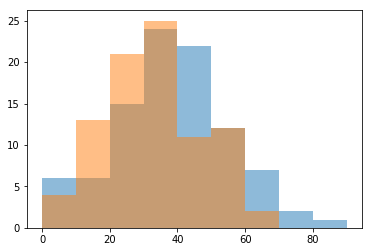

In [7]:
plt.hist(titanic_m['Age'],bins=range(0,100,10),alpha=0.5)
plt.hist(titanic_f['Age'],bins=range(0,100,10),alpha=0.5)

In [8]:
titanic_m['Age'].mean(),titanic_f['Age'].mean()

(38.45178947368421, 32.67613636363637)

In [9]:
ttest_ind(titanic_m['Age'],titanic_f['Age'])

Ttest_indResult(statistic=2.532197891266721, pvalue=0.012185117982449867)

### Experiment 2
Split criteria = SibSp  
Metric = Fare

In [10]:
titanic['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [11]:
titanic['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [12]:
titanic_sb = titanic[titanic['SibSp']==0]
titanic_nosb = titanic[titanic['SibSp']>1]

In [13]:
len(titanic_sb),len(titanic_nosb)

(608, 74)

In [14]:
titanic_sb['Fare'].mean(),titanic_nosb['Fare'].mean()

(25.692027960526318, 51.978322972972975)

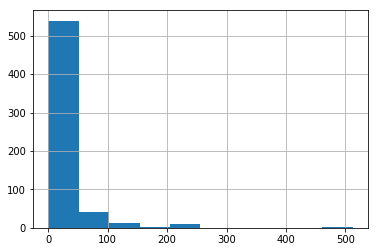

In [15]:
titanic_sb['Fare'].hist()

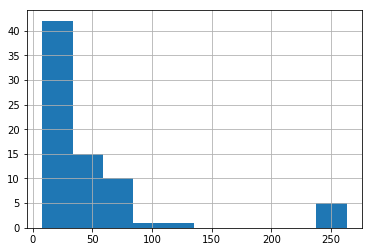

In [16]:
titanic_nosb['Fare'].hist()

In [17]:
ttest_ind(titanic_sb['Fare'],titanic_nosb['Fare'])

Ttest_indResult(statistic=-4.179943069904459, pvalue=3.296729584719343e-05)

### Experiment 3
split_criteria = letters in the name  
measure = SibSp

In [18]:
titanic['name_letters'] = titanic['Name'].apply(lambda x: len(x))

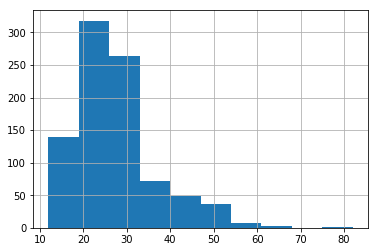

In [19]:
titanic['name_letters'].hist()

In [20]:
titanic_short = titanic[titanic['name_letters']<=30]
titanic_long = titanic[titanic['name_letters']>30]

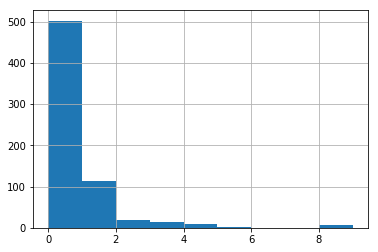

In [21]:
titanic_short['SibSp'].hist(bins=range(0,10))

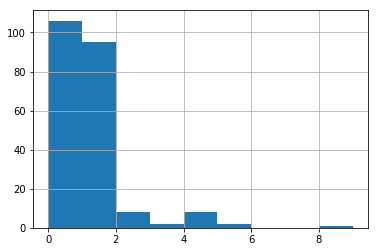

In [22]:
titanic_long['SibSp'].hist(bins=range(0,10))

In [23]:
titanic_short['SibSp'].mean(),titanic_long['SibSp'].mean()

(0.4469357249626308, 0.7522522522522522)

In [24]:
ttest_ind(titanic_short['SibSp'],titanic_long['SibSp'])

Ttest_indResult(statistic=-3.5985088878934355, pvalue=0.0003377242128643986)